# Data Analysis Project: E-Commerce Public Dataset

- Name: Hizkia Jefren Reppi
- Email: 21208008@unima.ac.id
- Id Dicoding: [Hizkia Jefren Reppi](https://dicoding.com/users/hizkiajefren)

## Business Questions

1. What products sell the most and least?
2. How much money did customers spend in the last few months?
3. What is the level of product sales on our E-Commerce platform over time?
4. What is the level of customer satisfaction with our services?
5. Where is the geographical location that has the most customers?

## Setup Data

In [1]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import unidecode
import matplotlib.image as mpimg

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [3]:
df_customers = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Datasets/customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_orders = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Datasets/orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
df_products = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Datasets/products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
df_sellers = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Datasets/sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [7]:
df_product_cat = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Datasets/product_category_name_translation.csv')
df_product_cat.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
df_order_rev = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Datasets/order_reviews_dataset.csv')
df_order_rev.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
df_order_pay = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Datasets/order_payments_dataset.csv')
df_order_pay.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [10]:
df_order_items = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Datasets/order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
df_geolocation = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Datasets/geolocation_dataset.csv')
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


### Assessing Data

### View info from each DataFrame

In [12]:
print('\n', df_customers.info())
print('\n', df_orders.info())
print('\n', df_products.info())
print('\n', df_sellers.info())
print('\n', df_product_cat.info())
print('\n', df_order_pay.info())
print('\n', df_order_rev.info())
print('\n', df_order_items.info())
print('\n', df_geolocation.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  ob

**Summary of Datasets**

| Dataset                  | Description                                                                               | Columns                                                         | Null Values                | Data Types                   |
|--------------------------|-------------------------------------------------------------------------------------------|-----------------------------------------------------------------|-----------------------------|------------------------------|
| Customer Dataset         | Information about customers, including unique IDs, zip code, city, and state.             | 5                                                               | No null values             | object(4), int64(1)         |
| Order Dataset            | Details about customer orders, including order ID, status, timestamps, and delivery dates. | 8                                                               | Some null values           | object(8)                   |
| Product Dataset          | Information about products, such as product ID, category, dimensions, and weight.          | 9                                                               | Various null values        | object(2), float64(7)      |
| Seller Dataset           | Details about sellers, including seller ID, zip code, city, and state.                      | 4                                                               | No null values             | object(3), int64(1)         |
| Product Category Dataset | Mapping between product categories in Portuguese and English.                               | 2                                                               | No null values             | object(2)                   |
| Payment Dataset          | Information about payments, including payment type, installments, and value.               | 5                                                               | No null values             | object(2), int64(2), float64(1) |
| Review Dataset           | Customer reviews with scores, comments, and timestamps.                                     | 7                                                               | Various null values        | object(6), int64(1)         |
| Order Items Dataset      | Details about items within orders, including item ID, product and seller IDs, and prices.  | 7                                                               | No null values             | object(4), int64(1), float64(2) |
| Geolocation Dataset      | Geographic information, including zip code, latitude, longitude, city, and state.           | 5                                                               | No null values             | int64(1), float64(2), object(2) |

### Checks for missing values on each DataFrame

In [13]:
print('\nInfo missing values on dataframe customers:\n', df_customers.isnull().sum())
print('\nInfo missing values on dataframe orders:\n', df_orders.isnull().sum())
print('\nInfo missing values on dataframe products:\n', df_products.isnull().sum())
print('\nInfo missing values on dataframe sellers:\n', df_sellers.isnull().sum())
print('\nInfo missing values on dataframe product category:\n', df_product_cat.isnull().sum())
print('\nInfo missing values on dataframe order reviews:\n', df_order_rev.isnull().sum())
print('\nInfo missing values on dataframe order payments:\n', df_order_pay.isnull().sum())
print('\nInfo missing values on dataframe order items:\n', df_order_items.isnull().sum())
print('\nInfo missing values on dataframe geolocation:\n', df_geolocation.isnull().sum())


Info missing values on dataframe customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info missing values on dataframe orders:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Info missing values on dataframe products:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Info missing values on dataframe sellers:
 seller_id              

**Missing Values Summary**

| Dataset                  | Columns with Missing Values                 | Number of Missing Values |
|--------------------------|---------------------------------------------|---------------------------|
| Customer Dataset         | None                                        | 0                         |
| Order Dataset            | order_approved_at, order_delivered_carrier_date, order_delivered_customer_date | 160, 1783, 2965           |
| Product Dataset          | product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm | 610, 610, 610, 610, 2, 2, 2, 2 |
| Seller Dataset           | None                                        | 0                         |
| Product Category Dataset | None                                        | 0                         |
| Review Dataset           | review_comment_title, review_comment_message | 87656, 58247              |
| Order Payments Dataset   | None                                        | 0                         |
| Order Items Dataset      | None                                        | 0                         |
| Geolocation Dataset      | None                                        | 0                         |

### Checks for duplicate data on each DataFrame

In [14]:
print('Info duplicated data on dataframe customers:', df_customers.duplicated().sum())
print('Info duplicated data on dataframe orders:', df_orders.duplicated().sum())
print('Info duplicated data on dataframe products:', df_products.duplicated().sum())
print('Info duplicated data on dataframe sellers:', df_sellers.duplicated().sum())
print('Info duplicated data on dataframe product category:', df_product_cat.duplicated().sum())
print('Info duplicated data on dataframe order reviews:', df_order_rev.duplicated().sum())
print('Info duplicated data on dataframe order payments:', df_order_pay.duplicated().sum())
print('Info duplicated data on dataframe order items:', df_order_items.duplicated().sum())
print('Info duplicated data on dataframe geolocation:', df_geolocation.duplicated().sum())

Info duplicated data on dataframe customers: 0
Info duplicated data on dataframe orders: 0
Info duplicated data on dataframe products: 0
Info duplicated data on dataframe sellers: 0
Info duplicated data on dataframe product category: 0
Info duplicated data on dataframe order reviews: 0
Info duplicated data on dataframe order payments: 0
Info duplicated data on dataframe order items: 0
Info duplicated data on dataframe geolocation: 261831


In [15]:
df_geolocation.describe(include='object')

,geolocation_city,geolocation_state
count,1000163,1000163
unique,8011,27
top,sao paulo,SP
freq,135800,404268


**Duplicated Data Summary**

| Dataset                  | Number of Duplicated Rows |
|--------------------------|---------------------------|
| Customer Dataset         | 0                         |
| Order Dataset            | 0                         |
| Product Dataset          | 0                         |
| Seller Dataset           | 0                         |
| Product Category Dataset | 0                         |
| Review Dataset           | 0                         |
| Order Payments Dataset   | 0                         |
| Order Items Dataset      | 0                         |
| Geolocation Dataset      | 261,831                   |


Geolocation Dataset	have 261,831 duplicated rows, this is possible because in the columns **'geolocation_city' and 'geolocation_state'** the highest value is **sao paulo (SP)**

### Describe of numeric data in each dataframe

In [16]:
print('\nDescription of numeric data on dataframe customers:\n', df_customers.describe())
print('\nDescription of numeric data on dataframe orders:\n', df_orders.describe())
print('\nDescription of numeric data on dataframe products:\n', df_products.describe())
print('\nDescription of numeric data on dataframe sellers:\n', df_sellers.describe())
print('\nDescription of numeric data on dataframe product category:\n', df_product_cat.describe())
print('\nDescription of numeric data on dataframe order reviews:\n', df_order_rev.describe())
print('\nDescription of numeric data on dataframe order payments:\n', df_order_pay.describe())
print('\nDescription of numeric data on dataframe order items:\n', df_order_items.describe())
print('\nDescription of numeric data on dataframe geolocation:\n', df_geolocation.describe())


Description of numeric data on dataframe customers:
        customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

Description of numeric data on dataframe orders:
                                 order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
count         99441                    99441                99281   
unique            8                    98875                90733   
top      

**Numeric Data Description Summary**

| Dataset                 | Column(s)                    | Count/Unique/Top/Freq                                      | Mean/Std/Min/25%/50%/75%/Max                             |
|-------------------------|------------------------------|------------------------------------------------------------|--------------------------------------------------------|
| Customer Dataset        | `customer_zip_code_prefix`    | Count: 99,441                                            | Mean: 35,137.47, Std: 29,797.94, Min: 1,003, 25%-Max: 99990 |
| Order Dataset           | Various                      | Count: 99,441, Unique/Top/Freq in several columns         | Not applicable (Timestamps, IDs, Status)                |
| Product Dataset         | Various                      | Count: 32,341                                            | Descriptive stats for product dimensions                |
| Seller Dataset          | `seller_zip_code_prefix`      | Count: 3,095                                             | Mean: 32,291.06, Std: 32,713.45, Min: 1,001, 25%-Max: 99730 |
| Product Category Dataset | Not applicable               | Count: 71                                                 | Not applicable (Categorical data)                      |
| Review Dataset           | `review_score`               | Count: 99,224                                            | Mean: 4.086, Std: 1.348, Min: 1, 25%-Max: 5              |
| Order Payments Dataset   | Various                      | Count: 103,886                                           | Descriptive stats for payment-related columns           |
| Order Items Dataset      | Various                      | Count: 112,650                                           | Descriptive stats for order item-related columns        |
| Geolocation Dataset      | Various                      | Count: 1,000,163                                         | Descriptive stats for geolocation-related columns       |


### Describe of categorical data in each dataframe

In [17]:
print('\nDescription of categorical data on dataframe customers:\n', df_customers.describe(include='object'))
print('\nDescription of categorical data on dataframe orders:\n', df_orders.describe(include='object'))
print('\nDescription of categorical data on dataframe products:\n', df_products.describe(include='object'))
print('\nDescription of categorical data on dataframe sellers:\n', df_sellers.describe(include='object'))
print('\nDescription of categorical data on dataframe product category:\n', df_product_cat.describe(include='object'))
print('\nDescription of categorical data on dataframe order reviews:\n', df_order_rev.describe(include='object'))
print('\nDescription of categorical data on dataframe order payments:\n', df_order_pay.describe(include='object'))
print('\nDescription of categorical data on dataframe order items:\n', df_order_items.describe(include='object'))
print('\nDescription of categorical data on dataframe geolocation:\n', df_geolocation.describe(include='object'))


Description of categorical data on dataframe customers:
                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   

       customer_city customer_state  
count          99441          99441  
unique          4119             27  
top        sao paulo             SP  
freq           15540          41746  

Description of categorical data on dataframe orders:
                                 order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a92

**Categorical Data Description Summary**

| Dataset                 | Column(s)                    | Unique/Top/Freq                                            | Count                  |
|-------------------------|------------------------------|------------------------------------------------------------|------------------------|
| Customer Dataset        | Various                      | Unique/Top/Freq in several columns                          | Count: 104,478         |
| Order Dataset           | `order_status`                | Unique/Top/Freq: 8/delivered/96,478                          | Count: 99,441          |
| Product Dataset         | `product_category_name`       | Unique/Top/Freq: 73/cama_mesa_banho/3,638                   | Count: 32,949          |
| Seller Dataset          | Various                      | Unique/Top/Freq in several columns                          | Count: 112,632         |
| Product Category Dataset | Not applicable               | Unique/Top/Freq in both columns                            | Count: 71              |
| Review Dataset           | Various                      | Unique/Top/Freq in several columns                          | Count: 99,224          |
| Order Payments Dataset   | `payment_type`                | Unique/Top/Freq: 5/credit_card/76,795                       | Count: 103,886         |
| Order Items Dataset      | Various                      | Unique/Top/Freq in several columns                          | Count: 112,650         |
| Geolocation Dataset      | `geolocation_city` and `geolocation_state` | Unique/Top/Freq in both columns               | Count: 1,000,163       |


### Cleaning Data

#### Cleaning Data on Orders Dataframe

In [18]:
df_orders[df_orders.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [19]:
datetime_oo = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_oo:
  df_orders[column] = pd.to_datetime(df_orders[column])

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [20]:
for column in datetime_oo:
  df_orders[column].fillna(df_orders[column].mode()[0], inplace=True)

df_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [21]:
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])

df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Cleaning Data on Products Dataframe

In [22]:
df_products['product_category_name'].fillna(df_products['product_category_name'].mode()[0], inplace=True)
df_products['product_name_lenght'].fillna(df_products['product_name_lenght'].mean(), inplace=True)
df_products['product_description_lenght'].fillna(df_products['product_description_lenght'].mean(), inplace=True)
df_products['product_photos_qty'].fillna(df_products['product_photos_qty'].mean(), inplace=True)
df_products.dropna(inplace=True)

df_products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Cleaning Data on Order Review Dataframe

In [23]:
df_order_rev[df_order_rev.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [24]:
df_order_rev.fillna(value="no comment", inplace=True)

df_order_rev.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [25]:
datetime_or = ["review_creation_date","review_answer_timestamp"]

for column in datetime_or:
  df_order_rev[column] = pd.to_datetime(df_order_rev[column])

df_order_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Because the dataframe that has duplicate data is in the Geolocation Dataframe, so I decided not to drop the duplicates because the possibility that happened was because in the column **'geolocation_city' and 'geolocation_state'** the highest value was **sao paulo (SP)**

## Exploratory Data Analysis

### Explore Customers Dataframe

In [26]:
df_customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
96598,7f6ea1a57ef2691275b59aa3322ee717,d12c2a88942a00137ad3edcf3fe2f888,50741,recife,PE
29520,51edd3e2ce3240854fe38ea1a71883e1,3980fd09827533d2afff3a21f1d690c4,29100,vila velha,ES
33229,1d6a944bceeba3cdb4ad7a1fe2938fd4,86bad679b2105392469601cac375740d,98803,santo angelo,RS
48066,551ce89f695ce165b0921d335e2590a2,08dab8a579f9d8b18b16e5ac24a3fec8,12090,taubate,SP
33113,fd23695e0d517c34af14f966b662f25e,fda22aab5a0b6b06cab9254859d35c13,8230,sao paulo,SP


In [27]:
df_customers.customer_id.is_unique

True

In [28]:
df_customers.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [29]:
df_customers.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore order payment dataframe

In [30]:
df_order_pay.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
102120,24464b3dfd623dbde6ceb96af55eba7e,1,credit_card,4,133.06
24005,2bab21da7cb38da9002fcb361c7c046f,1,credit_card,4,47.26
91493,d95d7dc42c0d8218358ebeabc7bb5dfc,1,credit_card,4,46.76
34956,59855c078a7519d73930b2c2ca624688,1,credit_card,8,186.87
76756,fb60bfb1c80eb02d4fc8efef7f25f87a,1,credit_card,1,191.13


In [31]:
df_order_pay.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [32]:
df_order_pay.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [33]:
df_order_pay.describe(include='object')

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


### Explore orders dataframe

In [34]:
df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
31564,d7ebe26f7b9c7600c40edd2b0edc7afc,994ce8a078d9b40c268787c6ff42d514,delivered,2017-05-20 10:41:57,2017-05-23 03:22:53,2017-05-25 10:37:45,2017-06-06 18:52:29,2017-07-03
4558,853196751437213c99b38f619b15c7d5,bee8c38659f6714c7bc7400419f8c029,delivered,2018-01-04 08:54:51,2018-01-04 09:06:23,2018-01-04 20:10:38,2018-01-10 17:17:55,2018-02-02
16178,28f746eeb91e247397a0eb18834a45a0,306a585046357d7895a655e98bce758b,shipped,2018-01-06 19:56:07,2018-01-06 20:07:19,2018-01-08 17:33:20,2016-10-27 17:32:07,2018-02-07
2183,cab041d8d606d6c9d3165da578795340,888d2ebe1af2a8c93c75dae5dfc23719,delivered,2017-05-13 13:16:20,2017-05-13 13:25:17,2017-05-16 04:41:47,2017-06-02 14:28:53,2017-06-19
80207,44701fee78d50ad4307eff3c630a4f24,94736ebf57b9caceb018f767340a8f59,delivered,2017-03-13 14:31:08,2017-03-13 14:31:08,2017-03-14 10:45:06,2017-03-19 07:41:53,2017-04-03


In [35]:
delivery_time = df_orders["order_delivered_customer_date"] - df_orders["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
df_orders["delivery_time"] = round(delivery_time/86400)

df_orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
46309,92de9d50e681619c103a7634c2f8bdaf,0e9ed7dc549f24ff1b3aefd168591469,delivered,2018-08-13 17:28:36,2018-08-13 17:44:12,2018-08-15 13:42:00,2018-09-01 02:18:43,2018-08-22,17.0
53835,e5fc50f8d64012ac844e3ac50b40fae5,09605433f6049326bfa21680262fc1fb,delivered,2018-05-02 21:56:21,2018-05-02 22:34:55,2018-05-04 15:19:00,2018-05-12 01:11:39,2018-05-25,7.0
63367,773091ea5794bbdf9e81ad2fde5f782c,36093bc2594cb63fc298650efa59b770,delivered,2017-08-22 13:29:48,2017-08-22 13:45:49,2017-08-23 18:40:07,2017-08-25 17:45:45,2017-09-18,2.0
29839,592f7e6106642583c61e25ecf2cb8cef,bd05d079f44e25d2c95a8935c2f83363,delivered,2018-05-14 15:58:22,2018-05-14 16:13:57,2018-05-16 15:01:00,2018-05-17 20:14:28,2018-05-22,1.0
70139,5dcfdc2d68c1f6c738bbb12bedf7a6cc,2d9e44d15887f511fd4e650144a25dc7,delivered,2018-01-02 17:19:30,2018-01-02 17:31:33,2018-01-05 19:28:37,2018-01-08 16:59:30,2018-01-18,3.0


<Axes: >

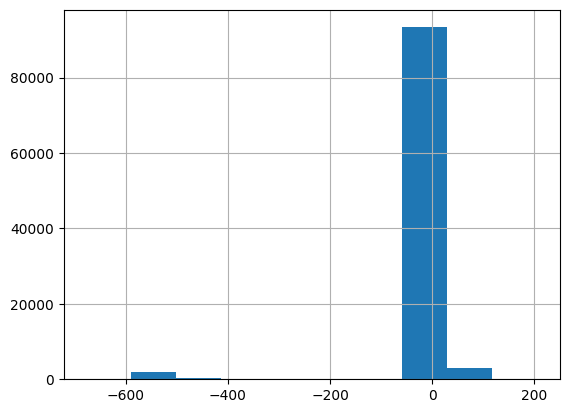

In [36]:
df_orders.delivery_time.hist()

In [37]:
df_customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
25196,06141f8e944874ca3909311c370f2830,b0208203b90ae4d547c3cc20e9b2942b,18705,avare,SP
5090,c92840b450cdab90816c60a32d4d2529,e3b95b3a21f997d5d3e88954f5ff074a,86020,londrina,PR
83789,bc2c3f39dc37bab49bdb42ea49d0b538,87c9e7ba960e4c2e6bd786b162adc639,57035,maceio,AL
59586,2f9665008b5e1b69ca1799f5554778cc,e17ddb851eb6f35f648cc1107cac1c45,45650,ilheus,BA
15603,3494e9d5086e44139641e3aefe16b768,977d8fa938090d14a398c9dc83bad338,29350,presidente kennedy,ES


In [38]:
customer_id_in_orders_df = df_orders.customer_id.values
df_customers["status"] = df_customers["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
df_customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
93260,9235b5fc6713b7c6c4f69975c54a8028,7e02c8933533aa2589986ed7dc51f359,18052,sorocaba,SP,Active
86762,4e495cb383a251b2a0b73491294268b6,46e7ed1ef9223b2026fb4919fc7c7f05,95901,lajeado,RS,Active
93719,31a8654d467ab5c0d7a4a273272c460f,86fae602a67c384fa4d64cd55fc51c52,13315,cabreuva,SP,Active
29428,47f2b4375b6c1aee9a4f95cbe493e064,ac546f61bb0d49eb5b0d8e61f10baccb,6145,osasco,SP,Active
24895,d1e0cbdd01f00d151ff8e890d9a8f612,a4669a28dd126c93ca64ddf49a15e496,14620,orlandia,SP,Active


In [39]:
df_customers.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

### Merge customers dataframe & orders dataframe

In [40]:
df_cust_orders = pd.merge(
    left=df_customers,
    right=df_orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

df_cust_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [41]:
df_cust_orders.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

> The dataset is concentrated in major cities, with São Paulo having the highest number of customers (15,540), followed by Rio de Janeiro (6,882) and Belo Horizonte (2,773).
This concentration suggests that these cities are significant markets for the E-Commerce platform.

In [42]:
df_cust_orders.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

- Delivered Orders:

  The majority of orders fall under the "delivered" status, constituting a significant portion of the dataset (96,478).
This indicates that a large number of customers have successfully received their orders.
Shipped and Processing Orders:

- "Shipped" and "processing" statuses represent ongoing order fulfillment.
"Shipped" has 1,107 orders, suggesting products are in transit to customers.
"Processing" includes 301 orders, indicating that they are in the pipeline for delivery.
Cancelled and Unavailable Orders:

- A smaller portion of orders (625) is marked as "canceled," possibly due to customer requests or inventory issues.
"Unavailable" status (609) may suggest products that are temporarily out of stock.
Invoiced and Created Orders:

- "Invoiced" orders (314) typically imply that invoices have been issued but the products may not have been shipped yet.
- "Created" status (5) represents newly created orders that are in the early stages of processing.
Approved Orders:

- Only 2 orders are marked as "approved," indicating that they have passed a certain approval stage.

In [43]:
df_cust_orders.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

> The user distribution by state indicates that the majority of customers are located in São Paulo (SP), constituting the largest user base with 41,746 customers. Other significant states include Rio de Janeiro (RJ) with 12,852 customers and Minas Gerais (MG) with 11,635 customers. The dataset also reflects user presence in states such as Rio Grande do Sul (RS), Paraná (PR), and Santa Catarina (SC), contributing to the platform's regional diversity.

### Merge order payment dataframe & order review dataframe

In [44]:
df_order_payrev = pd.merge(
    left=df_order_pay,
    right=df_order_rev,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

df_order_payrev.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,no comment,no comment,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,no comment,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,no comment,no comment,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,no comment,no comment,2017-12-21,2017-12-22 01:10:39


In [45]:
df_order_payrev.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

> The payment type distribution shows that the majority of transactions on the E-Commerce platform are made using credit cards, accounting for 76,505 transactions. Boleto, a popular Brazilian cash payment method, is the second most utilized payment type with 19,784 transactions. Voucher payments and debit card transactions contribute to the diversity of payment methods, with 3,866 and 1,528 transactions, respectively.

In [46]:
df_order_payrev.sort_values(by="payment_value", ascending=False).head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,no comment,"Peço por favor verificar a entrega do pedido, ...",2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,Entrega incompleta,"Comprei 04 unidades, e foram entregues apenas ...",2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,no comment,"Mesmo a máquina ter vindo errada, já se pronti...",2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,no comment,no comment,2017-06-06,2017-06-07 19:35:23
62765,2cc9089445046817a7539d90805e6e5a,1,boleto,1,6081.54,4069f5f76abb1cf501f2d4e614e1eaa4,1.0,no comment,no comment,2017-12-14,2017-12-14 15:30:42
43483,a96610ab360d42a2e5335a3998b4718a,1,credit_card,10,4950.34,52632252782892317727260a87bc0663,5.0,no comment,no comment,2017-04-18,2017-04-21 15:17:33
70713,b4c4b76c642808cbe472a32b86cddc95,1,credit_card,5,4809.44,0f39c8201a4782ed03470ed525e7d68b,1.0,no comment,no comment,2018-08-03,2018-08-05 05:34:57
6481,199af31afc78c699f0dbf71fb178d4d4,1,credit_card,8,4764.34,dbf39e1ecc23738d2e7b56875fb49fac,4.0,no comment,no comment,2017-05-08,2017-05-09 02:00:10
67923,8dbc85d1447242f3b127dda390d56e19,1,credit_card,8,4681.78,5740810e4d16fe8fc6a1b959558f63a5,5.0,Satisfeito,Cumpriu o prometido,2018-07-06,2018-07-06 21:30:22


In [47]:
df_order_payrev.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

#### Merge customer orders dataframe & order payrev dataframe

In [48]:
df_customers = pd.merge(
    left=df_cust_orders,
    right=df_order_payrev,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,no comment,no comment,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,no comment,no comment,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,no comment,no comment,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


### Explore order items dataframe & sellers dataframe

In [49]:
df_item_seller = pd.merge(
    left=df_order_items,
    right=df_sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
df_item_seller.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [50]:
df_item_seller.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: seller_id, dtype: int64

In [51]:
df_item_seller.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: seller_id, dtype: int64

### Explore products dataframe & product category dataframe

In [52]:
df_product = pd.merge(
    left=df_products,
    right=df_product_cat,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
df_product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [53]:
df_product.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3638
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

In [54]:
df_product.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           3638
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: product_id, dtype: int64

#### Merge product dataframe & item seller dataframe

In [55]:
df_sellers = pd.merge(
    left=df_product,
    right=df_item_seller,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

df_sellers.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [56]:
df_sellers.sort_values(by="price", ascending=False).head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73904,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49502,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71817,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32231,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
84488,259037a6a41845e455183f89c5035f18,pcs,55.0,1710.0,2.0,2900.0,35.0,10.0,40.0,computers,8dbc85d1447242f3b127dda390d56e19,1,c72de06d72748d1a0dfb2125be43ba63,2018-06-28 12:36:36,4590.00,91.78,46430,guanambi,BA
106387,a1beef8f3992dbd4cd8726796aa69c53,instrumentos_musicais,59.0,944.0,3.0,3550.0,71.0,34.0,22.0,musical_instruments,426a9742b533fc6fed17d1fd6d143d7e,1,512d298ac2a96d1931b6bd30aa21f61d,2018-08-16 14:24:28,4399.87,113.45,20060,rio de janeiro,RJ
104808,6cdf8fc1d741c76586d8b6b15e9eef30,consoles_games,59.0,3172.0,1.0,3050.0,34.0,10.0,22.0,consoles_games,68101694e5c5dc7330c91e1bbc36214f,1,ed4acab38528488b65a9a9c603ff024a,2018-04-05 08:27:27,4099.99,75.27,8260,sao paulo,SP
46033,dd113cb02b2af9c8e5787e8f1f0722f6,esporte_lazer,51.0,1511.0,1.0,8000.0,55.0,25.0,45.0,sports_leisure,b239ca7cd485940b31882363b52e6674,1,821fb029fc6e495ca4f08a35d51e53a5,2018-08-02 08:15:14,4059.00,104.51,2030,sao paulo,SP
40026,6902c1962dd19d540807d0ab8fade5c6,relogios_presentes,53.0,1773.0,2.0,800.0,16.0,11.0,11.0,watches_gifts,86c4eab1571921a6a6e248ed312f5a5a,1,fa1c13f2614d7b5c4749cbc52fecda94,2017-03-23 20:08:04,3999.90,17.01,13170,sumare,SP


In [57]:
df_sellers.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore geolocation dataframe

In [58]:
df_geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
934041,89700,-27.231648,-52.023722,concordia,SC
640330,38082,-19.760372,-47.881193,uberaba,MG
143807,5812,-23.654847,-46.734382,são paulo,SP
167225,6695,-23.529776,-46.966103,itapevi,SP
399950,19400,-21.880856,-51.845833,presidente venceslau,SP


In [59]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [60]:
df_geolocation['geolocation_city'] = df_geolocation['geolocation_city'].apply(pretty_string)
df_geolocation.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
20056       1
76370       1
63012       1
76372       1
32635       1
Length: 19015, dtype: int64

In [61]:
df_geolocation[df_geolocation['geolocation_zip_code_prefix'] == 24220].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470805,24220,-22.905817,-43.106989,niteroi,RJ
470811,24220,-22.902306,-43.112545,niteroi,RJ
470812,24220,-22.904567,-43.110491,niteroi,RJ
470820,24220,-22.902575,-43.109192,niteroi,RJ
470821,24220,-22.907500,-43.106170,niteroi,RJ


### Explore All Dataframe

In [62]:
df = pd.merge(
    left=df_customers,
    right=df_sellers,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119141 entries, 0 to 119140
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119141 non-null  object        
 1   customer_unique_id             119141 non-null  object        
 2   customer_zip_code_prefix       119141 non-null  int64         
 3   customer_city                  119141 non-null  object        
 4   customer_state                 119141 non-null  object        
 5   status                         119141 non-null  object        
 6   order_id                       119141 non-null  object        
 7   order_status                   119141 non-null  object        
 8   order_purchase_timestamp       119141 non-null  datetime64[ns]
 9   order_approved_at              119141 non-null  datetime64[ns]
 10  order_delivered_carrier_date   119141 non-null  datetime64[ns]
 11  

In [64]:
df.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              bed_bath_table                  29.90          16.79
                    computers_accessories           69.90          20.98

[25327 rows x 2 columns]

In [65]:
df.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_state product_category_name_english                        
AC             auto                            606.97         146.42
               baby                            697.84         174.13
               bed_bath_table                  634.60         217.95
               books_general_interest          633.80         123.71
               christmas_supplies               69.90          60.95
...                                               ...            ...
TO             sports_leisure                 5533.32        1393.53
               stationery                      276.80          73.80
               telephony                      1268.12         627.34
               toys                           1864.15         423.96
               watches_gifts                  5446.89         950.02

[1356 rows x 2 columns]

In [66]:
df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160067.46
PR,5045,1079708.45
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


In [67]:
df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         182          1.0  5.0
air_conditioning                   253          1.0  5.0
art                                202          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              350          1.0  5.0
...                                ...          ...  ...
stationery                        2311          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4199          1.0  5.0
toys                              3886          1.0  5.0
watches_gifts                     5624          1.0  5.0

[71 rows x 3 columns]

In [68]:
df.to_csv('e-commerce-df.csv', index=False)

## Data Visualization

### Question 1: What products sell the most and least?

In [69]:
df_sum_order_items = df.groupby("product_category_name_english")["product_id"].count().reset_index()
df_sum_order_items = df_sum_order_items.rename(columns={"product_id": "products"})
df_sum_order_items = df_sum_order_items.sort_values(by="products", ascending=False)

df_sum_order_items.head()

,product_category_name_english,products
7,bed_bath_table,13678
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


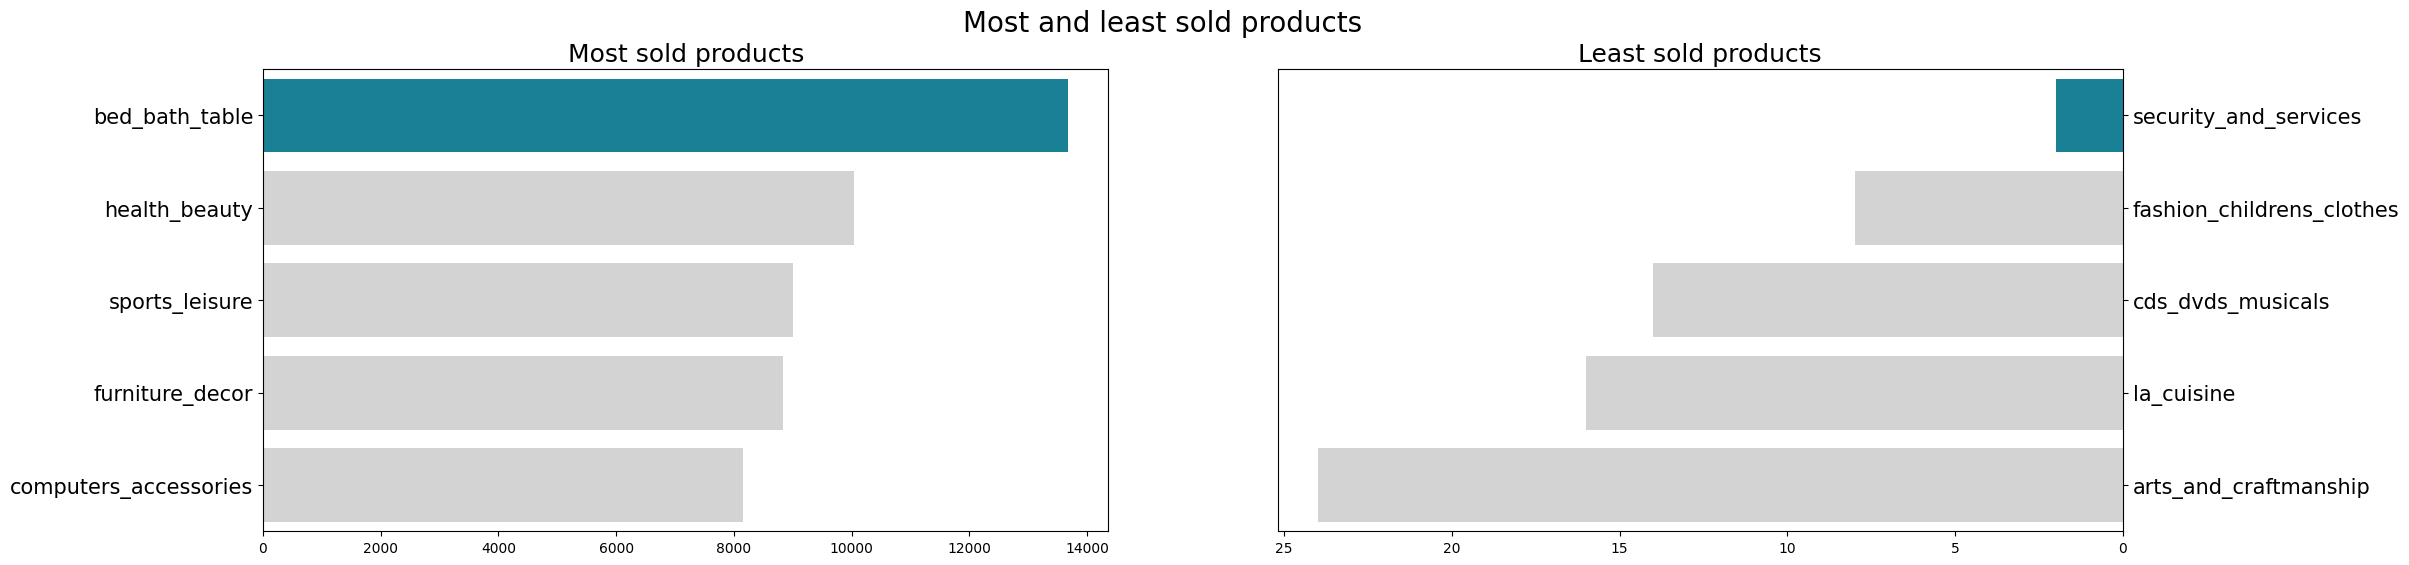

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="products", y="product_category_name_english", data=df_sum_order_items.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Most sold products", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="products", y="product_category_name_english", data=df_sum_order_items.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Least sold products", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Most and least sold products", fontsize=20)
plt.show()

> As seen in the visualization results, the most sold product is bed_bath_table. and the least sold product is security_and_services.

### Question 2 : How much money did customers spend in the last few months?

In [71]:
df_monthly_spend = df.resample(rule='M', on='order_approved_at').agg({"payment_value":"sum"})
df_monthly_spend.index = df_monthly_spend.index.strftime('%B')
df_monthly_spend = df_monthly_spend.reset_index()
df_monthly_spend.rename(columns={"payment_value":"total_spend"}, inplace=True)

df_monthly_spend.head(12)

,order_approved_at,total_spend
0,September,0.00
1,October,75985.54
2,November,0.00
3,December,19.62
4,January,182178.36
5,February,350023.57
6,March,547228.40
7,April,506506.84
8,May,736346.88
9,June,620082.95


In [72]:
df_monthly_spend = df_monthly_spend.sort_values('total_spend', ascending=False).drop_duplicates('order_approved_at', keep='last')
df_monthly_spend.head(12)

,order_approved_at,total_spend
11,August,882476.79
10,July,739098.77
8,May,736346.88
9,June,620082.95
6,March,547228.40
7,April,506506.84
5,February,350023.57
4,January,182178.36
1,October,75985.54
3,December,19.62


In [73]:
def sort_month(df):
  month_mapping = {
      "January": 1,
      "February": 2,
      "March": 3,
      "April": 4,
      "May": 5,
      "June": 6,
      "July": 7,
      "August": 8,
      "September": 9,
      "October": 10,
      "November": 11,
      "December": 12
  }

  df["month_numeric"] = df["order_approved_at"].map(month_mapping)
  df = df.sort_values("month_numeric")
  df = df.drop("month_numeric", axis=1)

  return df

In [74]:
df_monthly_spend = sort_month(df_monthly_spend)

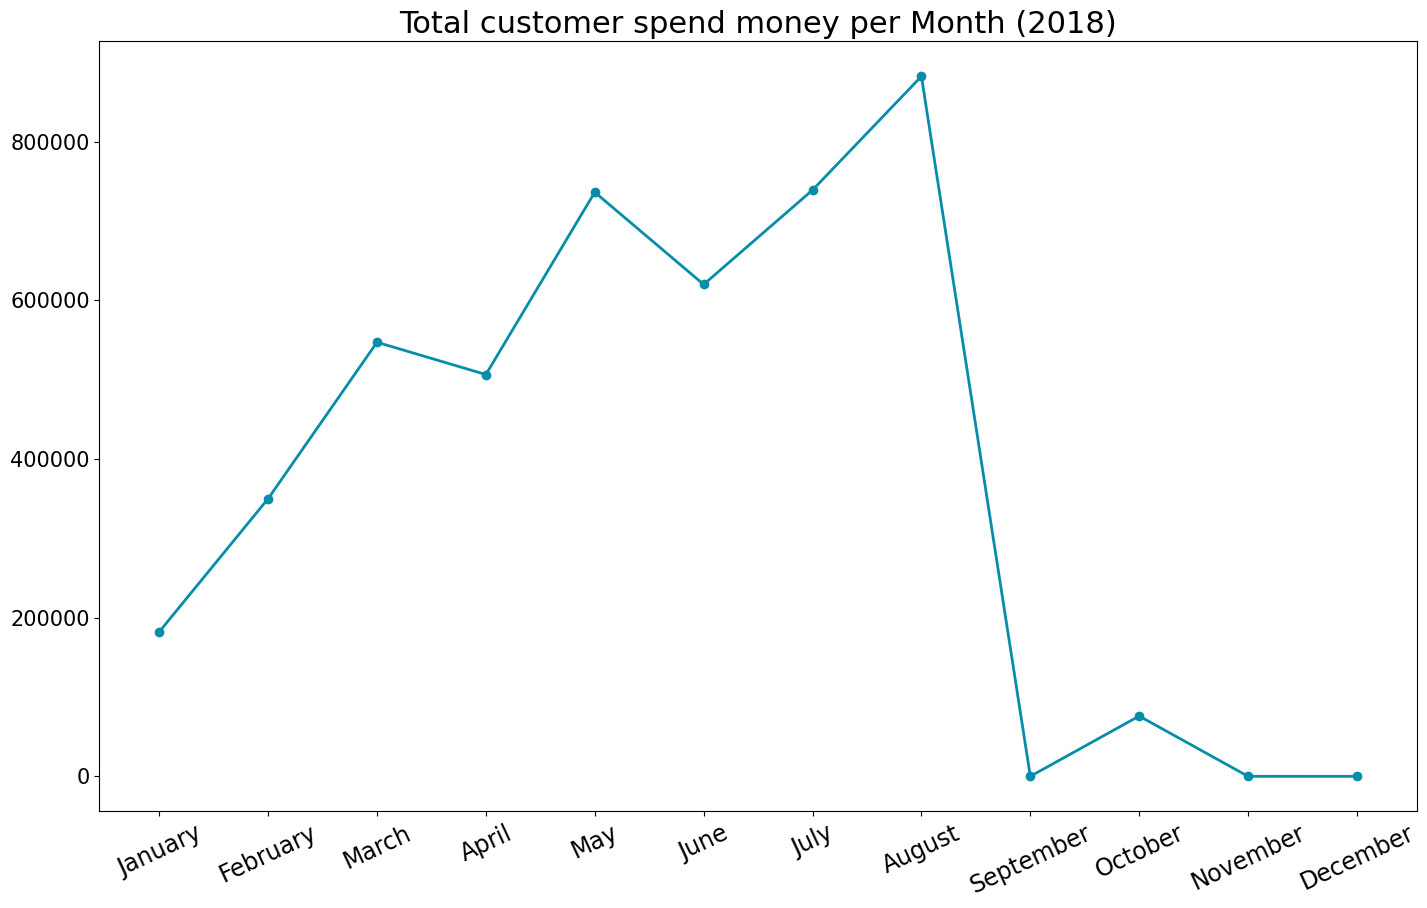

In [75]:
plt.figure(figsize=(17, 10))
plt.plot(
    df_monthly_spend["order_approved_at"],
    df_monthly_spend["total_spend"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)
plt.title("Total customer spend money per Month (2018)", loc="center", fontsize=22)
plt.xticks(fontsize=17, rotation=25)
plt.yticks(fontsize=15)
plt.show()

> From the results of this visualization, it is known that the most total money spent by users was in August 2018 and the least was in September 2018.

### Question 3 : What is the level of product sales on our E-Commerce platform over time?

In [76]:
df_monthly = df.resample(rule='M', on='order_approved_at').agg({"order_id": "nunique",})
df_monthly.index = df_monthly.index.strftime('%B')
df_monthly = df_monthly.reset_index()
df_monthly.rename(columns={"order_id": "order_count",}, inplace=True)

df_monthly.head()

,order_approved_at,order_count
0,September,1
1,October,320
2,November,0
3,December,1
4,January,760


In [77]:
df_monthly = df_monthly.sort_values('order_count').drop_duplicates('order_approved_at', keep='last')
df_monthly.head(12)

,order_approved_at,order_count
12,September,4301
13,October,4590
15,December,5832
21,June,6164
22,July,6176
23,August,6620
19,April,6778
17,February,6866
20,May,7066
16,January,7187


In [78]:
df_monthly = sort_month(df_monthly)

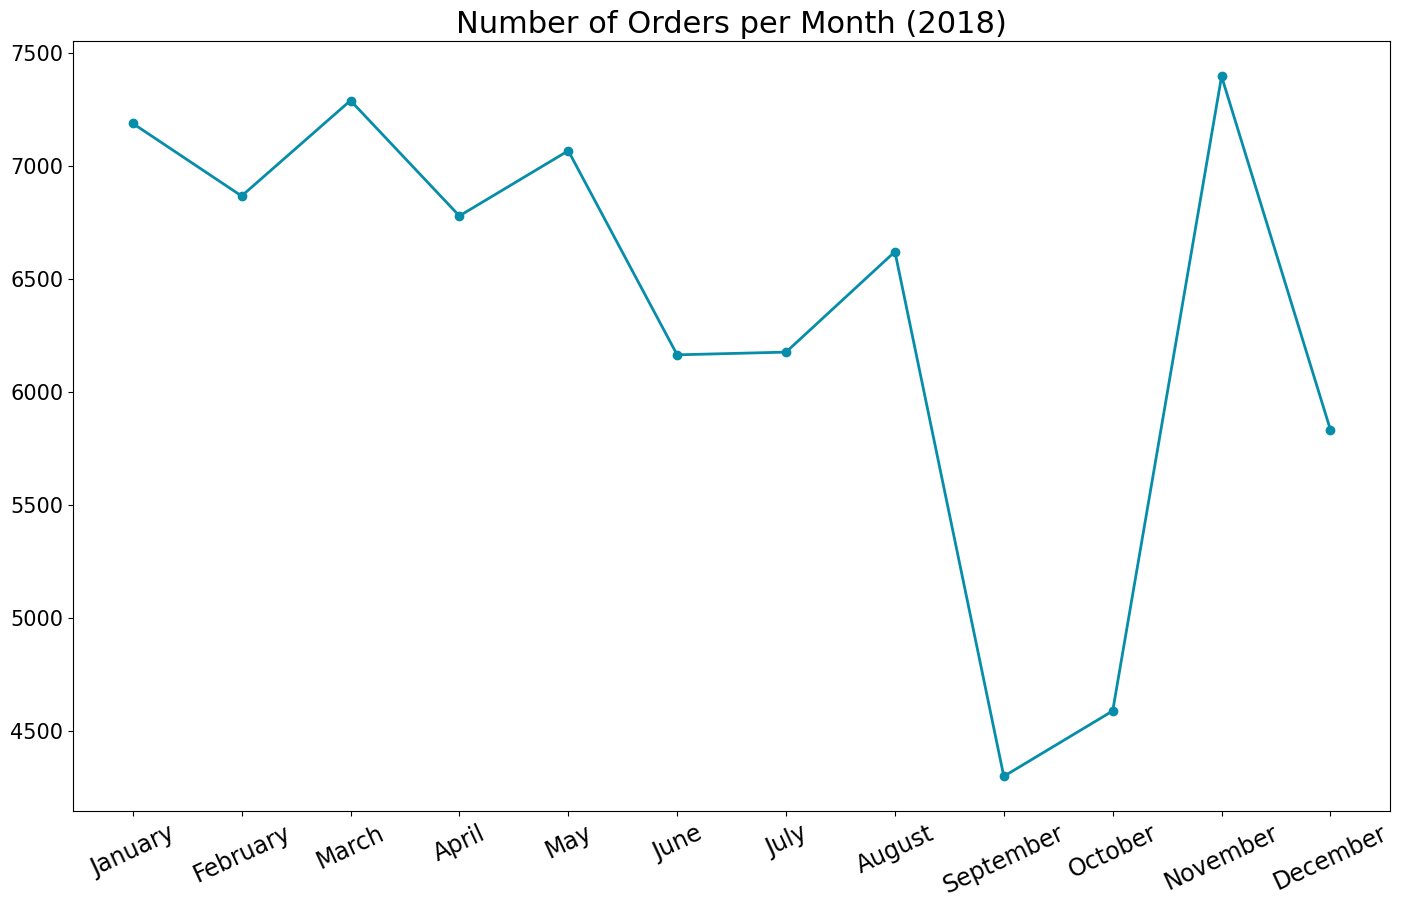

In [79]:
plt.figure(figsize=(17, 10))
plt.plot(
    df_monthly["order_approved_at"],
    df_monthly["order_count"],
    marker='o',
    linewidth=2,
    color="#068DA9"
)

plt.title("Number of Orders per Month (2018)", loc="center", fontsize=22)
plt.xticks(fontsize=17, rotation=25)
plt.yticks(fontsize=15)
plt.show()

> Based on the results of this visualization, in September 2018 there was a significant decrease, then experienced a significant increase in November 2018, and experienced a decrease in the following month.

### Question 4: What is the level of customer satisfaction with our services?

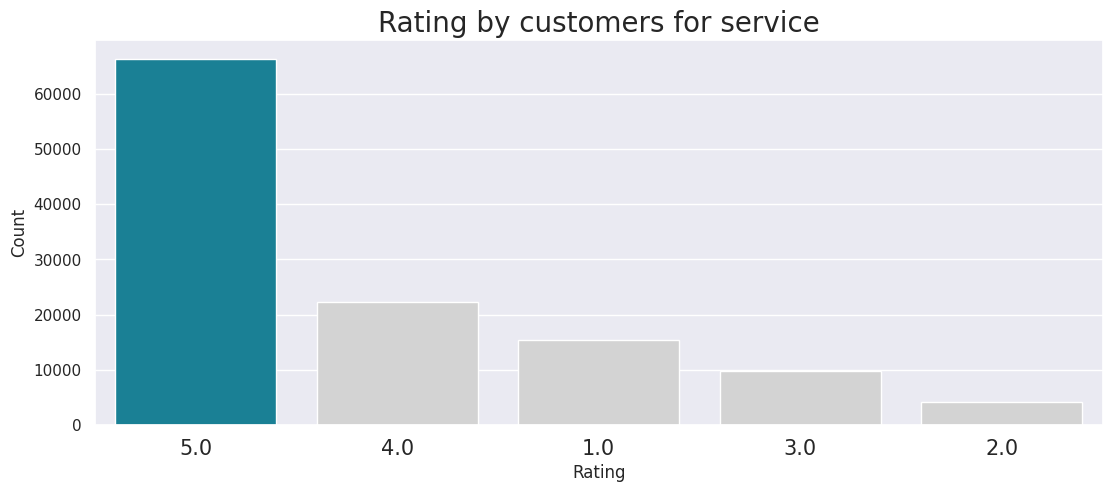

In [80]:
df_review_service_scores = df['review_score'].value_counts().sort_values(ascending=False)

most_common_score = df_review_service_scores.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(13, 5))
sns.barplot(
    x=df_review_service_scores.index,
    y=df_review_service_scores.values,
    order=df_review_service_scores.index,
    palette=["#068DA9" if score == most_common_score else "#D3D3D3" for score in df_review_service_scores.index]
)

plt.title("Rating by customers for service", fontsize=20)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=15)
plt.show()

> The visualization results show that customers who gave a rating of 5 have the most data than the other ratings. Based on this data, it can be concluded that customers are very satisfied with the services provided.

### Question 5: Where is the geographical location that has the most customers?

In [81]:
df_other_state_geolocation = df_geolocation.groupby(['geolocation_zip_code_prefix'])['geolocation_state'].nunique().reset_index(name='count')
df_other_state_geolocation[df_other_state_geolocation['count']>= 2].shape

max_state = df_geolocation.groupby(['geolocation_zip_code_prefix','geolocation_state']).size().reset_index(name='count').drop_duplicates(subset = 'geolocation_zip_code_prefix').drop('count',axis=1)

In [82]:
df_geolocation_silver = df_geolocation.groupby(['geolocation_zip_code_prefix','geolocation_city','geolocation_state'])[['geolocation_lat','geolocation_lng']].median().reset_index()
df_geolocation_silver = df_geolocation_silver.merge(max_state,on=['geolocation_zip_code_prefix','geolocation_state'],how='inner')

In [83]:
df_customers_silver = df_customers.merge(
    df_geolocation_silver,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)

df_customers_silver.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,geolocation_zip_code_prefix,geolocation_city,geolocation_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,4.0,no comment,no comment,2017-05-26,2017-05-30 22:34:40,14409,franca,SP,-20.50207,-47.396822
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,Active,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,2018-06-15 20:41:11,...,5.0,super recomendo,no comment,2018-06-22,2018-06-26 19:17:40,14409,franca,SP,-20.50207,-47.396822
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,Active,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,2017-09-09 15:50:24,...,5.0,no comment,no comment,2017-09-19,2017-09-20 03:47:39,14409,franca,SP,-20.50207,-47.396822
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,Active,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,2018-03-26 12:15:37,...,5.0,no comment,no comment,2018-03-29,2018-04-11 20:07:14,14409,franca,SP,-20.50207,-47.396822
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,Active,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,2018-07-29 20:55:21,...,5.0,no comment,no comment,2018-08-04,2018-08-04 23:20:25,14409,franca,SP,-20.50207,-47.396822


In [84]:
df_customers_silver.to_csv("customer_geolocation.csv", index=False)

In [85]:
def plot_brazil_map(data):
    brazil = mpimg.imread(urllib.request.urlopen('https://i.pinimg.com/originals/3a/0c/e1/3a0ce18b3c842748c255bc0aa445ad41.jpg'),'jpg')
    ax = data.plot(kind="scatter", x="geolocation_lng", y="geolocation_lat", figsize=(10,10), alpha=0.3,s=0.3,c='maroon')
    plt.axis('off')
    plt.imshow(brazil, extent=[-73.98283055, -33.8,-33.75116944,5.4])
    plt.show()

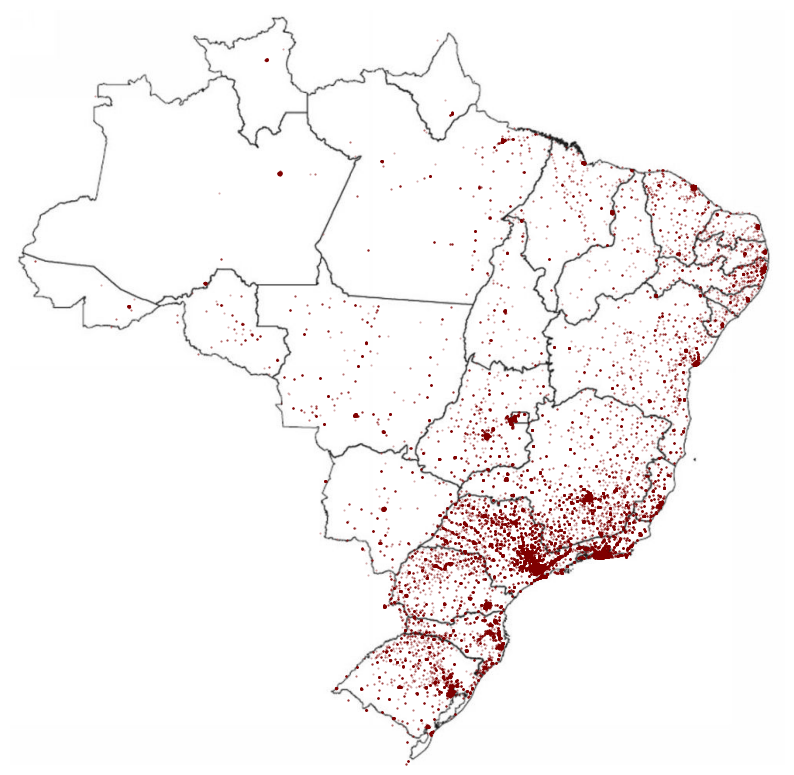

In [86]:
plot_brazil_map(df_customers_silver.drop_duplicates(subset='customer_unique_id'))

> Based on the visualization results, it was found that many customers came from southeastern and southern states.

## Conclusion

1. What products sell the most and least?
> Based on the visualization results that have been displayed, it can be concluded that customers buy bed_bath_table products more often, and security_and_services products are the least frequently purchased.

2. How much money did customers spend in the last few months?
> Based on the visualization results displayed, according to the graph in question 2, the total money spent by customers in January - May increased steadily, there was a decrease in June, then there was a significant increase in July - August, and experienced a significant decrease again in September.

3. What is the level of product sales on our E-Commerce platform over time?
> The level of E-Commerce sales was stable in January - May, the decrease was not significant in June-July, the increase was not significant in August, and the decrease was very significant in September, then there was a very significant increase in October-November and again decreased in December.

4. What is the level of customer satisfaction with our services?
> Customer satisfaction with the services provided is very satisfying because the visualization that has been displayed shows that there are very many customers who gave a rating of 5, and a rating of 4 is the 2nd most.

5. Where is the geographical location that has the most customers?
> According to the graph that has been created, there are more customers in the southeast and south. Other information, there are more customers in cities that are capitals (São Paulo, Rio de Janeiro, Porto Alegre, and others).